In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scale = 34

In [4]:
from os import walk
filelist = []
filepath = 'D:/data/20190716/'
for root, dirs, files in walk(filepath):
    for file in files:
        if '_trackinfo' in file:
            print(file)
            filelist.append(filepath + file)

A_nPVP0125-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_hom2_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_hom3_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_side1_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_side2_trackinfo.pkl
A_nPVP0125-2cc+m-1cc_side3_trackinfo.pkl
A_nPVP025-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP025-2cc+m-1cc_hom2_trackinfo.pkl
A_nPVP025-2cc+m-1cc_hom3_trackinfo.pkl
A_nPVP025-2cc+m-1cc_side1_trackinfo.pkl
A_nPVP025-2cc+m-1cc_side2_trackinfo.pkl
A_nPVP025-2cc+m-1cc_side3_trackinfo.pkl
A_nPVP05-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP05-2cc+m-1cc_hom2_trackinfo.pkl
A_nPVP05-2cc+m-1cc_hom3_trackinfo.pkl
A_nPVP05-2cc+m-1cc_side1_trackinfo.pkl
A_nPVP05-2cc+m-1cc_side2_trackinfo.pkl
A_nPVP05-2cc+m-1cc_side3_trackinfo.pkl
A_nPVP1-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP1-2cc+m-1cc_hom2_trackinfo.pkl
A_nPVP1-2cc+m-1cc_hom3_trackinfo.pkl
A_nPVP1-2cc+m-1cc_side1_trackinfo.pkl
A_nPVP1-2cc+m-1cc_side2_trackinfo.pkl
A_nPVP1-2cc+m-1cc_side3_trackinfo.pkl
A_nPVP2-2cc+m-1cc_hom1_trackinfo.pkl
A_nPVP2-2cc+m-1cc_hom2_trac

In [5]:
len(filelist)

35

In [6]:
dump_idx = list(range(0,35,3))

In [7]:
dump_idx

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33]

In [8]:
idx_1 = dump_idx
idx_2 = dump_idx[1:]

In [9]:
idx_2.append(35)

In [11]:
print(idx_1)
print(idx_2)

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33]
[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 35]


In [12]:
meanR_all = []
meanV_all = []
for idx_a,idx_b in zip(idx_1,idx_2):
    print(idx_a,idx_b)
    meanR = []
    meanV = []
    for infofile in filelist[idx_a:idx_b]:
        print(infofile)
        trackinfo = pd.read_pickle(infofile)
        filterinfo = trackinfo.loc[(trackinfo['IDcounts'] >= 200)].loc[(trackinfo['maxmove'] >= 50)].sort_values(by='IDcounts',ascending=False)
        meanR.append(filterinfo['meanR'].values/scale*1000)
        meanV.append(filterinfo['meanV'].values/scale*1000*25)
    meanR_all.append(meanR)
    meanV_all.append(meanV)

0 3
D:/data/20190716/A_nPVP0125-2cc+m-1cc_hom1_trackinfo.pkl
D:/data/20190716/A_nPVP0125-2cc+m-1cc_hom2_trackinfo.pkl
D:/data/20190716/A_nPVP0125-2cc+m-1cc_hom3_trackinfo.pkl
3 6
D:/data/20190716/A_nPVP0125-2cc+m-1cc_side1_trackinfo.pkl
D:/data/20190716/A_nPVP0125-2cc+m-1cc_side2_trackinfo.pkl
D:/data/20190716/A_nPVP0125-2cc+m-1cc_side3_trackinfo.pkl
6 9
D:/data/20190716/A_nPVP025-2cc+m-1cc_hom1_trackinfo.pkl
D:/data/20190716/A_nPVP025-2cc+m-1cc_hom2_trackinfo.pkl
D:/data/20190716/A_nPVP025-2cc+m-1cc_hom3_trackinfo.pkl
9 12
D:/data/20190716/A_nPVP025-2cc+m-1cc_side1_trackinfo.pkl
D:/data/20190716/A_nPVP025-2cc+m-1cc_side2_trackinfo.pkl
D:/data/20190716/A_nPVP025-2cc+m-1cc_side3_trackinfo.pkl
12 15
D:/data/20190716/A_nPVP05-2cc+m-1cc_hom1_trackinfo.pkl
D:/data/20190716/A_nPVP05-2cc+m-1cc_hom2_trackinfo.pkl
D:/data/20190716/A_nPVP05-2cc+m-1cc_hom3_trackinfo.pkl
15 18
D:/data/20190716/A_nPVP05-2cc+m-1cc_side1_trackinfo.pkl
D:/data/20190716/A_nPVP05-2cc+m-1cc_side2_trackinfo.pkl
D:/data/20

In [13]:
meanR_out = []
meanV_out = []
for dumpR,dumpV in zip(meanR_all,meanV_all):
    meanR_out.append(np.concatenate(dumpR).ravel())
    meanV_out.append(np.concatenate(dumpV).ravel())

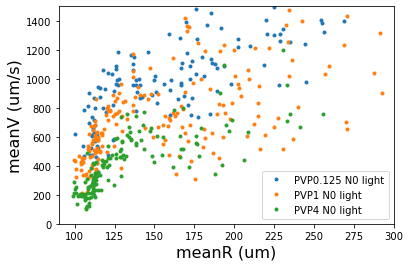

In [72]:
plt.plot(meanR_out[0],meanV_out[0],'.',label='PVP0.125 N0 light')
# plt.plot(meanR_out[2],meanV_out[2],'.',label='PVP0.25 N0 light')
# plt.plot(meanR_out[4],meanV_out[4],'.',label='PVP0.5 N0 light')
plt.plot(meanR_out[6],meanV_out[6],'.',label='PVP1 N0 light')
# plt.plot(meanR_out[8],meanV_out[8],'.',label='PVP2 N0 light')
plt.plot(meanR_out[10],meanV_out[10],'.',label='PVP4 N0 light')
plt.xlim([90,300])
plt.ylim([0,1500])
plt.xlabel('meanR (um)', fontsize=16)
plt.ylabel('meanV (um/s)', fontsize=16)
plt.legend()
plt.show()   

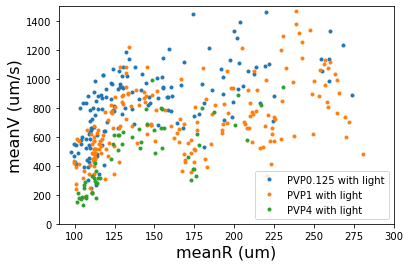

In [73]:
plt.plot(meanR_out[1],meanV_out[1],'.',label='PVP0.125 with light')
# plt.plot(meanR_out[3],meanV_out[3],'.',label='PVP0.25 with light')
# plt.plot(meanR_out[5],meanV_out[5],'.',label='PVP0.5 with light')
plt.plot(meanR_out[7],meanV_out[7],'.',label='PVP1 with light')
# plt.plot(meanR_out[9],meanV_out[9],'.',label='PVP2 with light')
plt.plot(meanR_out[11],meanV_out[11],'.',label='PVP4 with light')
plt.xlim([90,300])
plt.ylim([0,1500])
plt.xlabel('meanR (um)', fontsize=16)
plt.ylabel('meanV (um/s)', fontsize=16)
plt.legend()
plt.show()   

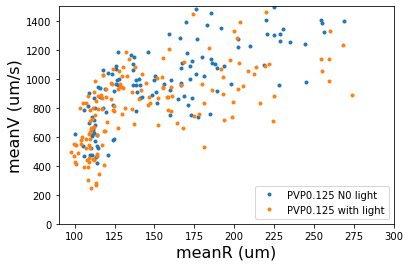

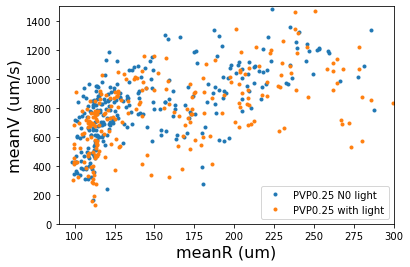

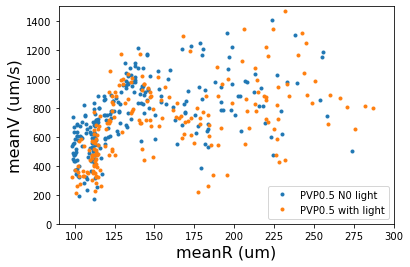

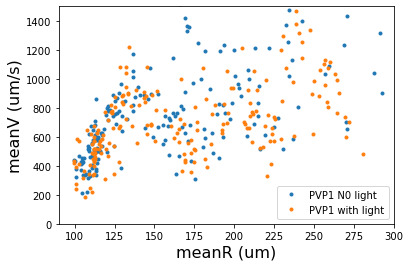

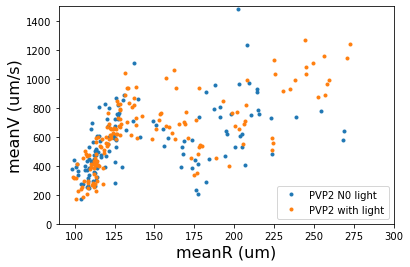

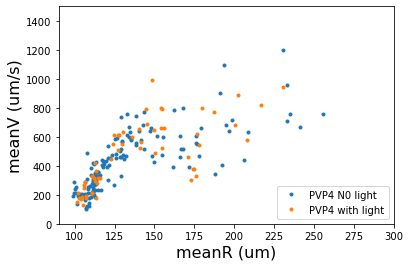

In [78]:
label = [0.125,0.25,0.5,1,2,4]

for loopcount, i in enumerate(label): 

    plt.plot(meanR_out[loopcount*2],meanV_out[loopcount*2],'.',label="PVP"+str(i)+" N0 light")
    plt.plot(meanR_out[loopcount*2+1],meanV_out[loopcount*2+1],'.',label="PVP"+str(i)+" with light")
    plt.xlim([90,300])
    plt.ylim([0,1500])
    plt.xlabel('meanR (um)', fontsize=16)
    plt.ylabel('meanV (um/s)', fontsize=16)
    plt.legend(loc='lower right')
    plt.show()   

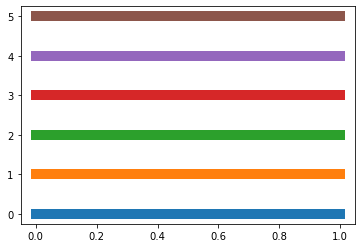

In [68]:
test = [[ 0,  1,  2,  3,  4,  5],
       [ 0,  1,  2,  3,  4,  5]]
plt.plot(test,linewidth=10)
plt.show()

In [32]:
test

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

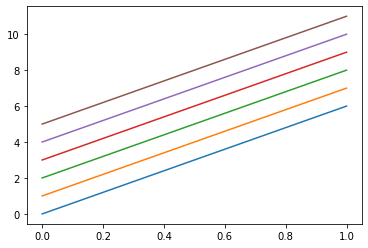